In [234]:

import pandas as pd
import folium
import numpy as np
import re
from folium.plugins import HeatMapWithTime as HMWT
from folium.plugins import HeatMap as HM
import requests
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns

In [235]:
from pycaret.datasets import get_data
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [236]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline        

import numpy as np
import pandas as pd 

from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor as RFR

In [237]:
from xgboost import XGBRegressor as XGBR
import xgboost as xgb

In [238]:
df = pd.read_csv('train.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2842228,20211205213126,2021-12-06,Your little appartment on wheels,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",https://a0.muscache.com/pictures/cc2aa51a-3c11...,3040748,https://www.airbnb.com/users/show/3040748,...,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,https://www.airbnb.com/rooms/41236669,20211205213126,2021-12-06,Spacious 4p city center apartment (2 bedrooms!),Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,https://a0.muscache.com/pictures/5f33bf5a-399c...,34773624,https://www.airbnb.com/users/show/34773624,...,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40


In [239]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [240]:
df_rev = df.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
     'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
     'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
     'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
     'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
     'neighbourhood', 'neighbourhood_cleansed',
     'neighbourhood_group_cleansed',
                         'latitude',
                         'longitude',
                         'property_type',
     'room_type', 'accommodates',
     'bathrooms', 'bathrooms_text',
     'bedrooms', 'beds', 'amenities',
     #'price',
     'minimum_nights',
     'maximum_nights',
     'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
     'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
     'availability_30', 'availability_60', 'availability_90',
     'availability_365', 'calendar_last_scraped',# 'number_of_reviews',
     'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review',  'review_scores_rating',
    # 'review_scores_accuracy',
     #'review_scores_cleanliness',
    # 'review_scores_checkin',
    # 'review_scores_communication',
    # 'review_scores_location',
    # 'review_scores_value',
     'license', 'instant_bookable',
     'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
     'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
     'reviews_per_month'],axis=1)

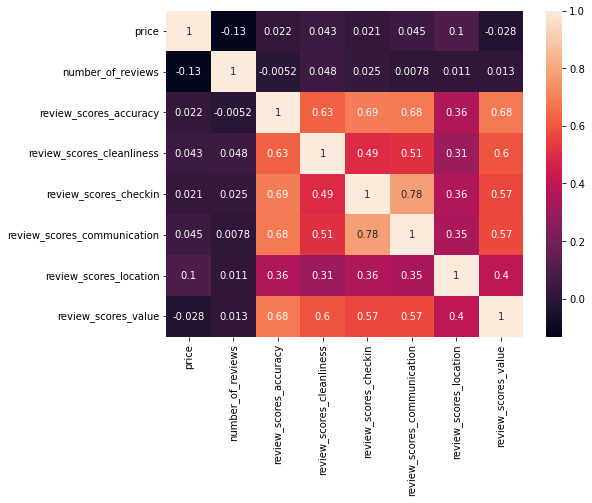

In [241]:
corr_df = df_rev.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [242]:
df_type = df.drop(['id', 
                   'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
     'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
     'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
     'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
     'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
     'neighbourhood', 'neighbourhood_cleansed',
     'neighbourhood_group_cleansed',
                   'latitude',
                         'longitude',
                        # 'property_type',
     'room_type', 'accommodates',
     'bathrooms', 'bathrooms_text',
     'bedrooms', 'beds', 'amenities',
     #'price',
     'minimum_nights',
     'maximum_nights',
     'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
     'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
     'availability_30', 'availability_60', 'availability_90',
     'availability_365', 'calendar_last_scraped', 'number_of_reviews',
     'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review',  'review_scores_rating',
     'review_scores_accuracy',
     'review_scores_cleanliness',
     'review_scores_checkin',
     'review_scores_communication',
     'review_scores_location',
     'review_scores_value',
     'license', 'instant_bookable',
     'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
     'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
     'reviews_per_month'],axis=1)

In [243]:
def cleaning_property(x):
    if "Entire" in x:
        return "Entire"
    if "Private room" in x:
        return "Private room" 
    if "boat" in x:
        return "boat" 
    if "room" in x:
        return "room"
    if "hotel" in x:
        return "hotel"
    if "shared" in x:
        return "shared"
    else:
        return "none"

In [244]:
    df_type["property_type"]=df_type.property_type.apply(cleaning_property)

In [245]:
property_type=pd.get_dummies(df_type.property_type, drop_first=True)
df_type=pd.concat([df_type,property_type], axis=1)

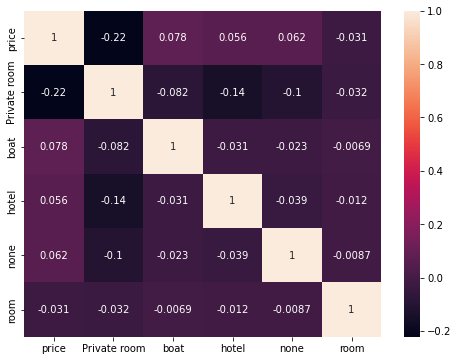

In [246]:
corr_df = df_type.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [247]:
def cleaning_property(x):
    if "Entire" in x:
        return 3 
    if "Private room" in x:
        return 2 
    if "boat" in x:
        return 1.5 
    if "room" in x:
        return 1
    if "hotel" in x:
        return 2
    if "shared" in x:
        return 1
    else:
        return 0

In [248]:
def cleaning_bath(x):
    try:
        if "half" in x or "Half" in x:
            return 0.5
        else:
            return float((re.findall("[+-]?([0-9]+([.][0-9]*)?|[.][0-9]+)",x))[0][0])
    except:
        return x

In [249]:
def clean_ame(x):   
    a = ["Balcony",
    "Bed linen",
    "Coffee machine",
    "Basic cooking equipment",
    "Child friendly",
    "Outdoor space",
    "Long term stays allowed",
    "Private entrance",
    "Safe or security system",
    "Self check-in"]
    b = ["washer",
    "dryer",
    "dish",
    "Elevator", "TV"]
    c = ["parking",
    "pet"]
    count=0
    for i in a:
        if i in x:
            count +=2
    for i in b:
        if i in x:
            count +=0.5
    for i in c:
        if i in x:
            count -=2
    return count


In [250]:
clean_ame(["dish",
    "Bed linen"])

2.5

In [251]:
def clean_instant_bookable(x):
    if x == "t":
        return 1
    else:
        return 0

In [252]:
def clean_all(x):
    
    df_clean_1 = x.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
     'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
     'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
     'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', #'host_listings_count',
     'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
     'neighbourhood', #'neighbourhood_cleansed',
     'neighbourhood_group_cleansed',
                         'latitude',
                         'longitude',
                         #'property_type',
     'room_type', #'accommodates',
     'bathrooms', #'bathrooms_text',
     'bedrooms', 'beds', #'amenities',
    # 'price',
     #'minimum_nights',
    # 'maximum_nights',
     'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
     'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
     'availability_30', 'availability_60', #'availability_90',
     'availability_365', 'calendar_last_scraped',# 'number_of_reviews',
     'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review',  #'review_scores_rating',
     'review_scores_accuracy',
     'review_scores_cleanliness',
     'review_scores_checkin',
     'review_scores_communication',
    # 'review_scores_location',
    # 'review_scores_value',
     'license',# 'instant_bookable',
     'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
     'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
     'reviews_per_month'],axis=1)
    
    df_clean_1["property_type"]=df_clean_1.property_type.apply(cleaning_property)
    df_clean_1["bathrooms_text"]=df_clean_1.bathrooms_text.apply(cleaning_bath)
    df_clean_1['bathrooms_text'].fillna((df_clean_1['bathrooms_text'].mean()), inplace=True)
    df_clean_1["amenities"]=df_clean_1.amenities.apply(clean_ame)
    df_clean_1["instant_bookable"]=df_clean_1.instant_bookable.apply(clean_instant_bookable)
    df_clean_2 =df_clean_1.fillna(4.79)
    
    neighbourhood_cleansed=pd.get_dummies(df_clean_2.neighbourhood_cleansed, drop_first=True)
    df_clean_2=pd.concat([df_clean_2,neighbourhood_cleansed], axis=1)
    
    df_clean_2.drop('neighbourhood_cleansed', axis=1,inplace=True)
    if "price" in df_clean_2.columns:
        df_clean_2 = df_clean_2[df_clean_2.price != 0]
        df_clean_2 = df_clean_2[df_clean_2.price != 6477]
    return df_clean_2

In [253]:
clean_df = clean_all(df)


In [254]:
"""corr_df = clean_df.corr(method='pearson')

plt.figure(figsize=(50, 50))
sns.heatmap(corr_df, annot=True)
plt.show()"""

"corr_df = clean_df.corr(method='pearson')\n\nplt.figure(figsize=(50, 50))\nsns.heatmap(corr_df, annot=True)\nplt.show()"

In [255]:
clean_df.to_csv('df_clean_2.csv', index=False)

A probar con los test


In [256]:
X=clean_df.drop('price', axis=1)

In [257]:
y=clean_df.price

In [258]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [259]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)
    y_pred_train=modelo.predict(X_train)
    y_pred_test=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    
    mse_train = mse(y_pred_train,y_train,squared=False)
    mse_test = mse(y_pred_test,y_test,squared=False)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('mse_train:', mse_train) 
    print('mse_test:', mse_test) 
    print('\n')

In [260]:
modelos=[LinReg(), 
         Lasso(), 
         ElasticNet(),
         RFR(max_leaf_nodes=50, n_estimators=5),
         xgb.XGBRegressor(learning_rate=0.25,n_estimators=8)]

for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train: 0.3916874514992804
Test: 0.3363480910086739
mse_train: 89.5265395175397
mse_test: 99.30546515525612


Lasso()
Train: 0.3716523927839497
Test: 0.32741667935612173
mse_train: 90.98889547225696
mse_test: 99.9714572150276


ElasticNet()
Train: 0.32589235189301524
Test: 0.3086692882766775
mse_train: 94.24385393977988
mse_test: 101.35516879600564


RandomForestRegressor(max_leaf_nodes=50, n_estimators=5)
Train: 0.604496377332628
Test: 0.32988866230303193
mse_train: 72.18777287016745
mse_test: 99.78757276632821


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=8, n_jobs=8,
             num_parallel_tree=1, predictor='auto', rand

/home/ricardo/anaconda3/envs/ironhack/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/ricardo/anaconda3/envs/ironhack/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [261]:
def prueba_todo(modelo):

    modelo.fit(X, y)

    y_pred=modelo.predict(X)

    total_score=modelo.score(X, y)  
    
    print(modelo)
    print('Total:', total_score) 
    print('\n')
    
    # Predecir con df_test limpio en vez de X, luego la y_predict seria una columna de price de cada ID

In [262]:
for m in modelos:
    prueba_todo(m)

LinearRegression()
Total: 0.3818617671274259


Lasso()
Total: 0.3602689681572573


ElasticNet()
Total: 0.32223174221782824


RandomForestRegressor(max_leaf_nodes=50, n_estimators=5)
Total: 0.5993119642033748


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=8, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Total: 0.5947859409736013




/home/ricardo/anaconda3/envs/ironhack/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [263]:
X_u=clean_df.drop('price', axis=1)

In [264]:
Y_u=clean_df.price

In [265]:
X_train_u, X_test_u, y_train_u, y_test_u = tts(X, y, test_size=0.2)

In [274]:
final = xgb.XGBRegressor(learning_rate=0.25,n_estimators=8)

In [275]:
#final.fit(X_train_u,y_train_u)

In [276]:
final.fit(X_u,Y_u)

/home/ricardo/anaconda3/envs/ironhack/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=8, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [277]:
final.score(X_train_u,y_train_u)

0.5906234543853126

In [278]:
y_pred_u=final.predict(X_test_u)

/home/ricardo/anaconda3/envs/ironhack/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [279]:
mse(y_pred_u,y_test_u,squared=False)

67.76612433851069

Listo Train, viene Test


In [280]:
df_test = pd.read_csv('test.csv')

In [283]:
df_test_clean = clean_all(df_test)

In [284]:
sample=pd.read_csv('sample.csv')

In [285]:
sample.price = final.predict(df_test_clean)
#c = pd.DataFrame(final.predict(b)).to_csv('sample2.csv')
#c = pd.DataFrame(final.predict(b))

/home/ricardo/anaconda3/envs/ironhack/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [286]:
sample.to_csv('sample_XGB6.csv', index=False)

In [287]:
sample.head()

,price,id
0,123.366859,0
1,154.514984,1
2,106.951996,2
3,95.018394,3
4,120.854431,4
